## MP Phase 1

**S11 - Group okurrskrt**

**Submitted By:** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**Chua Ching, Janine**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**Dytoc, Ayisha**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**Ileto, Maxine**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**Tan, Jared**

# Introduction

## Target Task

In sports, soccer remains to be one of the world's most popular sports. Accurately predicting match results is a pursuit that intrigues both enthusiasts, analysts, and even the casual audience. The dataset under consideration provides a unique opportunity to explore this problem by focusing on the **classification task of determining whether the home team is winning or not given a set of features**.

This classification task holds significance for various applications, including live match analysis or strategic decision-making. With this in mind, the classifications to be developed would be the **K-Nearest Neighbors (KNN) model**, the **multinomial classification**, and **binomial classification**. 

# Dataset Description

## Brief Description

The dataset comprises 10,000 random snapshots, each representing a single timestamp during a soccer match. These snapshots encompass a range of essential features, offering a glimpse into the ongoing match dynamics. Key attributes for this dataset include the current minute of play, goals scored by each team, yellow and red cards issued, attacks attempted, dangerous attacks attempted, corners awarded, missed shots off target, missed shots on target, and possession percentages for both the home and away teams.

## Data Collection Process


## Dataset Features

The dataset contains a total of 20 variables (columns). The following are the descriptions of each variable in the dataset:

- **`uuid`**: The unique identifier of the snapshot
- **`current_minute`**: The current minute of the in-play match. Important: the 15 min half-time break is included, so a match will have a total of 105 min. A current_minute of 70 corresponds to the actual match time of 55.
- **`home_score`**: Goals scored by the home team as of this current_minute
- **`away_score`**:  Goals scored by the away team as of this current_minute
- **`home_yellow_cards`**: Yellow cards given to the home team as of this current_minute
- **`away_yellow_cards`**: Yellow cards given to the away team as of this current_minute
- **`home_red_cards`**: Red cards given to the home team as of this current_minute
- **`away_red_cards`**: Red cards given to the away team as of this current_minute
- **`home_attacks`**: Attacks attempted by the home team as of this current_minute
- **`away_attacks`**: Attacks attempted by the away team as of this current_minute
- **`home_dangerous_attacks`**: Dangerous attacks attempted by the home team as of this current_minute
- **`away_dangerous_attacks`**: Dangerous attacks attempted by the away team as of this current_minute
- **`home_corners`**: Corners awarded to the home team as of this current_minute
- **`away_corners`**: Corners awarded to the away team as of this current_minute
- **`home_off_target`**: Shots that didn't have to be cleared by the goalkeeper that were 
attempted to the home team as of this current_minute
- **`away_off_target`**: Shots that didn't have to be cleared by the goalkeeper that were 
attempted to the away team as of this current_minute
- **`home_on_target`**:  Shots that had to be cleared by the goalkeeper that were attempted to 
the home team as of this current_minute
- **`away_on_target`**: Shots that had to be cleared by the goalkeeper that were attempted to 
the away team as of this current_minute
- **`home_possession`**: How much ball possession in % did the home team have until this 
current_minute
- **`away_possession`**: The unique identifier of the snapshot

## Features to be Used

Out of the 20 features in the dataset, the following features seem to be useful at first glance:

1. **`home_attacks`**
2. **`away_attacks`**
3. **`home_dangerous_attacks`**
4. **`away_dangerous_attacks`**
5. **`home_on_target`**
6. **`away_on_target`**

These features stand out as they can be used to identify a team's aggresiveness in trying to score for a goal. Attacks are used as a metric to show a certain team is going towards the goal, with dangerous attacks indicating they are in the danger zone, very near the goal. On target can also be used to show how a team's shots are accurate enough to be in the goal, needing the opposing goal keeper's intervetion to block it. While off target can be used to indicate that a ball was shot, it can be misleading as shooting the ball from very far out of bounds is also a tactic in football to delay the time for the opposing team. 

To compress these features, it is also possible to consolidate pairs into one feature:
1. **`attacks_difference`** - The difference between the home **`home_attacks`** and the **`away_attacks`**.
2. **`attacks_dangerouse_difference`** - The difference between the home **`home_dangerous_attacks`** and the **`away_dangerous_attacks`**
3. **`on_target_difference`** - The difference between the home **`home_on_target`** and the **`away_on_target`**.

By consolidating these paired features, it can: reduce the dimensionality of your dataset. This is particularly useful when dealing with a large number of features, as it can simplify the model, improve output interpretability, and reduce computa. 


# List of requirements

List all python libraries and modules used

In [1]:
# Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing and cleaning

The data used in this project is stored in the `sports.csv` file. This data will be stored in a variable called `df`

Below is a sample of the first 5 rows of the dataset.

In [2]:
df = pd.read_csv('sports.csv')
df.head()

,uuid,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,...,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
0,2f9dd904-8d9d-4aa0-a9d9-4e0f3e50d742,94,1,2,0,0,0,0,39,45,...,26,4,1,4,0,4,6,48,52,1
1,869c1420-9153-4d73-8d79-5db31a8a80a4,91,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,50,50,1
2,549e25a3-4c93-459d-b115-fb303273c78a,3,0,0,0,0,0,0,3,1,...,0,0,0,0,0,0,0,62,38,4
3,287b4be5-9163-4e2e-895d-d11052a97410,17,0,0,1,0,0,0,41,46,...,25,1,0,0,2,0,0,55,45,2
4,a607da6a-d6b2-4652-b7a5-6c8e4b61c2b8,76,1,0,1,0,0,0,69,78,...,46,1,1,0,3,4,4,45,55,0


Given that we will only be using the specific features in the data, we will extract only the features that are relevant to the project. The following features will be extracted and pre-processed: 
- **`current_minute`**
- **`home_score`**
- **`away_score`**
- **`home_attacks`**
- **`away_attacks`**
- **`home_dangerous_attacks`**
- **`away_dangerous_attacks`**
- **`home_on_target`**
- **`away_on_target`**

In [3]:
df = df[["current_minute","home_score", 'away_score', 'home_attacks','away_attacks','home_dangerous_attacks','away_dangerous_attacks','home_on_target','away_on_target']]
df.head()

,current_minute,home_score,away_score,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_on_target,away_on_target
0,94,1,2,39,45,29,26,4,6
1,91,2,0,0,0,0,0,0,0
2,3,0,0,3,1,1,0,0,0
3,17,0,0,41,46,11,25,0,0
4,76,1,0,69,78,21,46,4,4


We will now begin cleaning the data.

First, we will check if there are any null or missing values.

In [4]:
df.isnull().any()

current_minute            False
home_score                False
away_score                False
home_attacks              False
away_attacks              False
home_dangerous_attacks    False
away_dangerous_attacks    False
home_on_target            False
away_on_target            False
dtype: bool

Based on the output above, we can see that they are all `False`, indicating that there are no null or missing values.

We will next check if the data types of the variables are consistent.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   current_minute          7000 non-null   int64
 1   home_score              7000 non-null   int64
 2   away_score              7000 non-null   int64
 3   home_attacks            7000 non-null   int64
 4   away_attacks            7000 non-null   int64
 5   home_dangerous_attacks  7000 non-null   int64
 6   away_dangerous_attacks  7000 non-null   int64
 7   home_on_target          7000 non-null   int64
 8   away_on_target          7000 non-null   int64
dtypes: int64(9)
memory usage: 492.3 KB


Based on the output, we can see that all items in the data are non-null and have the integer data type.

We will now check if there are any default values within the data, which can be indicated by values that go beyond the data range (ex. below the minimum values or above the maximum)

In [6]:
df.describe()

,current_minute,home_score,away_score,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_on_target,away_on_target
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,59.491571,0.796000,0.623143,46.365429,43.325143,27.611429,24.201286,2.172143,1.796000
std,35.827892,1.070503,0.923248,36.004908,33.428276,22.977844,20.457007,2.320374,2.026002
min,-348.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,15.000000,14.000000,8.000000,7.000000,0.000000,0.000000
50%,70.000000,0.000000,0.000000,43.000000,41.000000,25.000000,21.000000,2.000000,1.000000
75%,88.000000,1.000000,1.000000,71.000000,67.000000,42.000000,36.000000,3.000000,3.000000
max,583.000000,8.000000,9.000000,255.000000,183.000000,134.000000,140.000000,22.000000,19.000000


Based on the output above, we can note the following:
- The minimum value of **`current_minute`** is a negative value, while the maximum value goes beyond the total match time. 
- The minimum and maximum values of the remaining features are within the proper range.

Since for this project we will be predicting whether the home team is winning or losing, we would ideally want the match to have sufficient data to be able to accurately predict this. If the match has barely begun, there might not be enough data to create an accurate prediction, and this may also skew the training data.

With this, we will only use the match data for games that are either from the break time (eg. the middle of the game) or in the game's second half.

In [7]:
df = df[ df['current_minute'] >= 45 ]
df = df[ df['current_minute'] <= 105 ]
df['current_minute'].describe()

count    4112.000000
mean       82.137889
std        14.433778
min        45.000000
25%        73.000000
50%        83.000000
75%        94.000000
max       105.000000
Name: current_minute, dtype: float64

In [8]:
len(df)

4112

As shown, the values for **`current_minute`** are now within the appropriate time range.

This now leaves us with 4112 items in the dataset.

We will now drop any duplicated data.

In [9]:
df.drop_duplicates()
len(df)

4112

The number of rows in the dataset did not change, indicating that there were no duplicates.

Lastly, since we are only checking whether or not the home team is winning, we will remove any draw games from the dataset. This is indicated by games where the number of points of the home and away team are equal.

In [10]:
df = df[ (df['home_score'] != df['away_score']) ]
len(df)

2824

This now leaves us with 2824 items in the dataset.

With the data cleaned, we will now create columns for the extra features that will be used in this project. Since we will need to determine whether or not the home team is winning, we can create an extra variable named **`home_is_winning`**, which will be a boolean variable of whether or not the home team's score is higher than the away team's.

As shown in the dataset, a majority of the variables come in pairs, with one corresponding to the home team and the other to the away team. For the remaining features used, we will merge these pairs into a single feature, denoted by the difference of the home team's statistic and the away team's statistic. This will be done to simplify the features used into a single variable, which can make the modelling process easier to perform.

Below is an explanation of the extra features that will be added:
- **`attacks_difference`**: Solved by subtracting `away_attacks` from `home_attacks`
- **`attacks_dangerous_difference`**: Solved by subtracting `away_dangerous_attacks` from `home_dangerous_attacks`
- **`on_target_difference`**: Solved by subtracting `away_on_target` from `home_on_target`

In [11]:
# Add home_is_winning feature
create_new_column = lambda row: True if (row["home_score"] > row["away_score"]) else False
added_column = df.apply(create_new_column, axis=1)
df["home_is_winning"] = added_column

# Add attacks_difference feature
create_new_column = lambda row: row["away_attacks"] - row["home_attacks"]
added_column = df.apply(create_new_column, axis=1)
df["attacks_difference"] = added_column

# Add attacks_dangerous_difference feature
create_new_column = lambda row: row["home_dangerous_attacks"] - row["away_dangerous_attacks"]
added_column = df.apply(create_new_column, axis=1)
df["attacks_dangerous_difference"] = added_column

# Add on_target_difference feature
create_new_column = lambda row: row["home_on_target"] - row["away_on_target"]
added_column = df.apply(create_new_column, axis=1)
df["on_target_difference"] = added_column

df.head()

,current_minute,home_score,away_score,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_on_target,away_on_target,home_is_winning,attacks_difference,attacks_dangerous_difference,on_target_difference
0,94,1,2,39,45,29,26,4,6,False,6,3,-2
1,91,2,0,0,0,0,0,0,0,True,0,0,0
4,76,1,0,69,78,21,46,4,4,True,9,-25,0
5,92,2,0,87,72,40,35,3,3,True,-15,5,0
8,68,0,2,27,41,20,31,1,4,False,14,-11,-3


We will now remove the unused features that we merged.

In [12]:
df = df[['current_minute','home_is_winning','attacks_difference','attacks_dangerous_difference','on_target_difference']]
df.head()

,current_minute,home_is_winning,attacks_difference,attacks_dangerous_difference,on_target_difference
0,94,False,6,3,-2
1,91,True,0,0,0
4,76,True,9,-25,0
5,92,True,-15,5,0
8,68,False,14,-11,-3


We will now normalize the numerical data used in the dataset.

In [13]:
columns_to_normalize = ['attacks_difference','attacks_dangerous_difference','on_target_difference']
df[columns_to_normalize] = df[columns_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.head()

,current_minute,home_is_winning,attacks_difference,attacks_dangerous_difference,on_target_difference
0,94,False,0.539749,0.461538,0.484848
1,91,True,0.514644,0.443787,0.545455
4,76,True,0.552301,0.295858,0.545455
5,92,True,0.451883,0.473373,0.545455
8,68,False,0.573222,0.378698,0.454545


# Exploratory Data Analysis

What is the distribution of the current_minute variable? Are there certain minutes that occur more frequently?

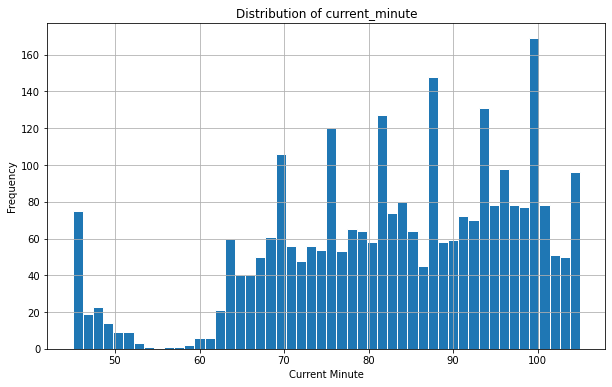

In [14]:
df['current_minute'].hist(bins=50, edgecolor='w', figsize=(10, 6))
plt.title('Distribution of current_minute')
plt.xlabel('Current Minute')
plt.ylabel('Frequency')
plt.show()

Other than this simply being our data, there is a considerable observed dip in data between current_time 45 and 60. This is likely because the distribution between 45 and 60 minutes corresponds to the halftime break in football matches. The lack of data may suggest that snapshots were seldom taken during break times, but as the match itself was in progress.

How many matches in the dataset resulted in the home team winning?

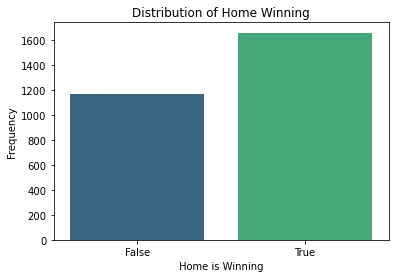

Is the home team winning?
 True     1659
False    1165
Name: home_is_winning, dtype: int64


In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x='home_is_winning', data=df, palette='viridis')
plt.title('Distribution of Home Winning')
plt.xlabel('Home is Winning')
plt.ylabel('Frequency')

plt.show()

print("Is the home team winning?\n", df['home_is_winning'].value_counts())

In exploring the distribution of the home team winning, it was found that the home team wins more than the away team, being 494 more wins. This may indicate a class imbalance. However, it is also worth noting that being the Home team has inherent advantages which may not be found in the data such as being more familiar with the playing environment, crowd support, and reduced travel-related fatigue. Therefore, the apparent class imbalance may be a reflection of these inherent advantages rather than a data-related issue. Considering these factors is crucial in interpreting the results accurately and deciding on an appropriate strategy for modeling

Is there any noticeable trend in home team winning based on the current minute?

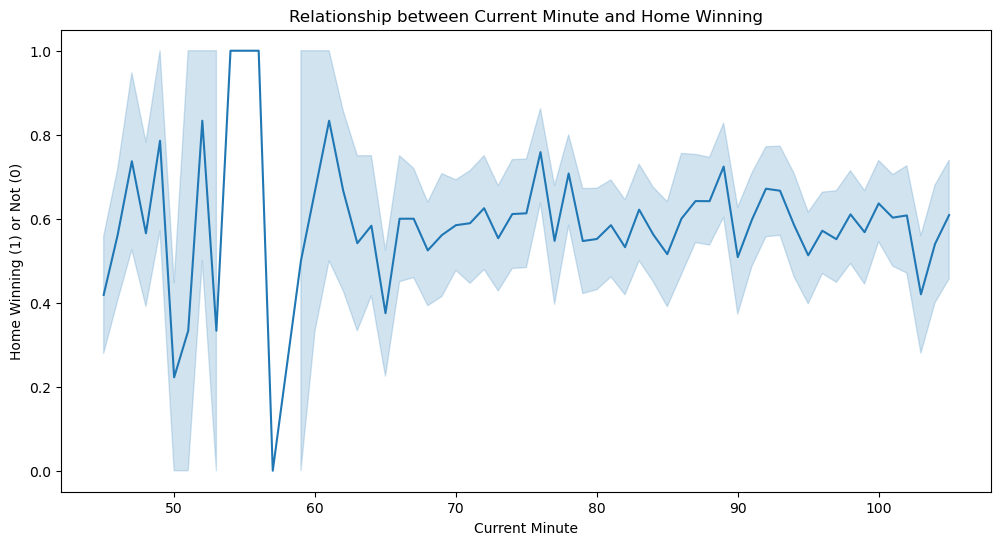

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='current_minute', y='home_is_winning', data=df)
plt.title('Relationship between Current Minute and Home Winning')
plt.xlabel('Current Minute')
plt.ylabel('Home Winning (1) or Not (0)')
plt.show()

There does not appear to be a noticeable trend in home team winning based on the current minute. The absence of a clear pattern suggests that the current minute alone may not be a strong predictor of home team success in your dataset.

How does possession percentage vary between home and away teams, and how does it relate to home team winning?

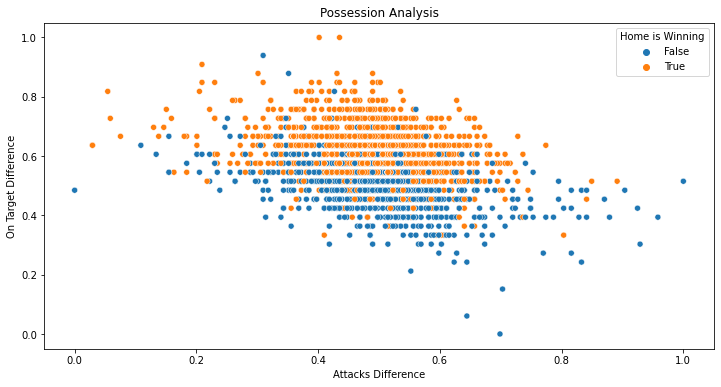

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='attacks_difference', y='on_target_difference', hue='home_is_winning', data=df)
plt.title('Possession Analysis')
plt.xlabel('Attacks Difference')
plt.ylabel('On Target Difference')
plt.legend(title='Home is Winning')
plt.show()

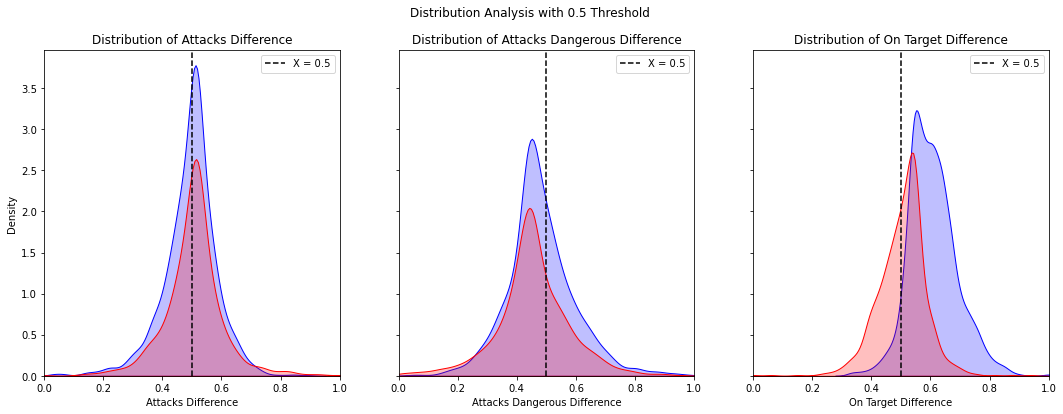

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for 'attacks_difference'
sns.kdeplot(data=df, x='attacks_difference', fill=True, hue='home_is_winning', ax=axes[0], palette={True: 'blue', False: 'red'})
axes[0].set_title('Distribution of Attacks Difference')
axes[0].set_xlabel('Attacks Difference')
axes[0].set_ylabel('Density')
axes[0].set_xlim(left=min(df['attacks_difference']), right=max(df['attacks_difference']))
axes[0].axvline(x=0.5, color='black', linestyle='--', label='X = 0.5')
axes[0].legend()

# Plot for 'attacks_dangerous_difference'
sns.kdeplot(data=df, x='attacks_dangerous_difference', fill=True, hue='home_is_winning', ax=axes[1], palette={True: 'blue', False: 'red'})
axes[1].set_title('Distribution of Attacks Dangerous Difference')
axes[1].set_xlabel('Attacks Dangerous Difference')
axes[1].set_ylabel('')
axes[1].set_xlim(left=min(df['attacks_dangerous_difference']), right=max(df['attacks_dangerous_difference']))
axes[1].axvline(x=0.5, color='black', linestyle='--', label='X = 0.5')
axes[1].legend()

# Plot for 'on_target_difference'
sns.kdeplot(data=df, x='on_target_difference', fill=True, hue='home_is_winning', ax=axes[2], palette={True: 'blue', False: 'red'})
axes[2].set_title('Distribution of On Target Difference')
axes[2].set_xlabel('On Target Difference')
axes[2].set_ylabel('')
axes[2].set_xlim(left=min(df['on_target_difference']), right=max(df['on_target_difference']))
axes[2].axvline(x=0.5, color='black', linestyle='--', label='X = 0.5')
axes[2].legend()

plt.suptitle('Distribution Analysis with 0.5 Threshold')
plt.show()


`Attacks Difference`:
The distribution analysis reveals symmetrical triangular curves for both winning and losing instances in attacks_difference, with peaks close to each other on the x-axis, indicating a balanced representation of attack differences. This may indicate that this feature may not be the strongest indicator of winning or losing.

`Attacks Dangerous Difference`:
The distribution analysis indicates that, on average, the away team tends to execute more dangerous attacks in attacks_dangerous_difference. The peaks are centered around 0.45 on the x-axis, with 0.5 indicating an equal proportion of dangerous attacks between the home and away teams. The leftward shift of the peak suggests that values below 0.5 represent a higher proportion of dangerous attacks by the away team.

`On Target Difference`:
On_target_difference presents a distinct asymmetry, with a substantial portion of losing instances clustering before x = 0.5, while most winning instances concentrate above x = 0.5. This implies that the home team's advantage in on-target attempts becomes more pronounced when the difference surpasses the 0.5 threshold, serving as a potential influential factor in match outcomes.


What is the correlation between different features, especially the selected key features and the target variable (home_is_winning)? Are there any strong correlations between possession percentages (home_possession and away_possession) and the outcome?

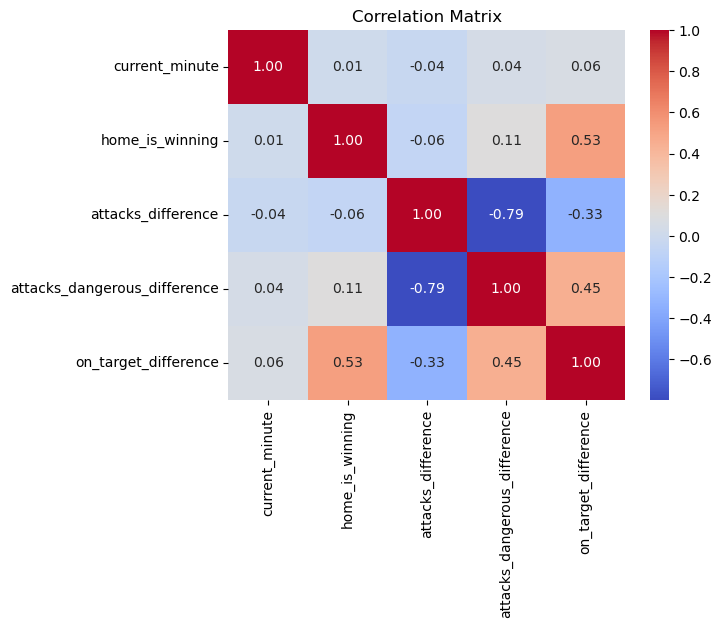

In [16]:
key_features = ['current_minute', 'home_is_winning', 'attacks_difference', 'attacks_dangerous_difference', 'on_target_difference']
correlation_matrix = df[key_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

A positive correlation of 0.53 between `home_is_winning` and `on_target_difference` indicates that an increase in the difference in on-target attempts is moderately associated with an increased likelihood of the home team winning.

A strong negative correlation of -0.79 between `attacks_difference` and `attacks_dangerous_difference` suggests a significant negative relationship. As the difference in total attacks increases, the difference in dangerous attacks tends to decrease, and vice versa.

A positive correlation of 0.33 between `attacks_difference` and `on_target_difference` indicates a weak positive relationship. An increase in the difference in total attacks is weakly associated with a slight increase in the difference in on-target attempts.

A moderate positive correlation of 0.45 between `attacks_dangerous_difference` and `on_target_difference` suggests a moderate positive relationship. An increase in the difference in dangerous attacks is moderately associated with an increase in the difference in on-target attempts.

What is the distribution of the average attacks difference per current minute?

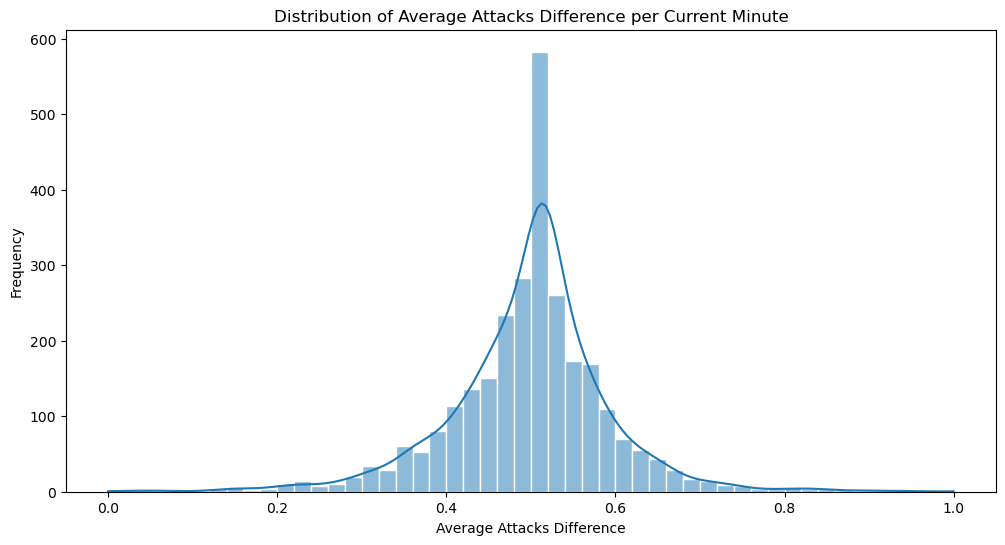

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(x='attacks_difference', data=df, bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average Attacks Difference per Current Minute')
plt.xlabel('Average Attacks Difference')
plt.ylabel('Frequency')
plt.show()

What is the distribution of the average attacks dangerous difference per current minute?

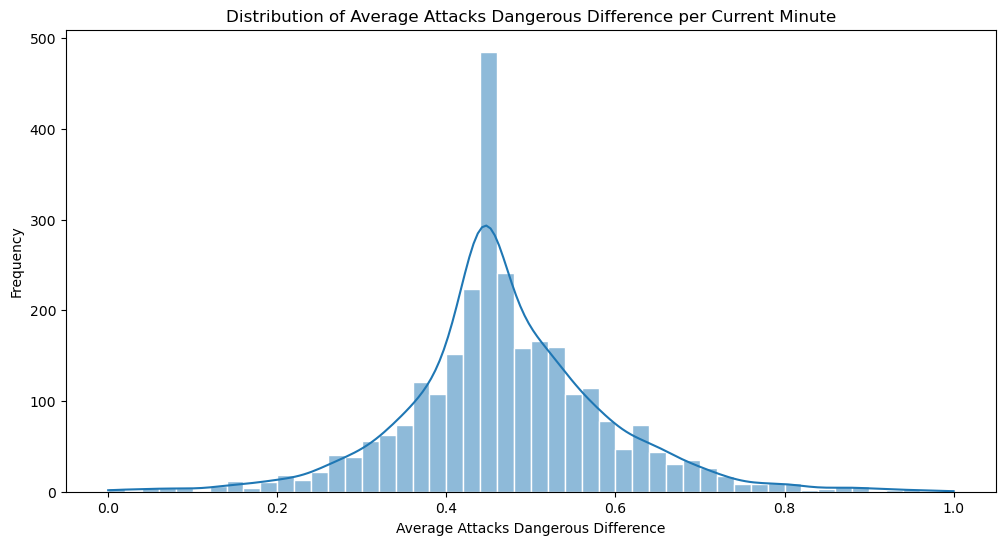

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(x='attacks_dangerous_difference', data=df, bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average Attacks Dangerous Difference per Current Minute')
plt.xlabel('Average Attacks Dangerous Difference')
plt.ylabel('Frequency')
plt.show()

What is the distribution of the average on target difference per current minute?

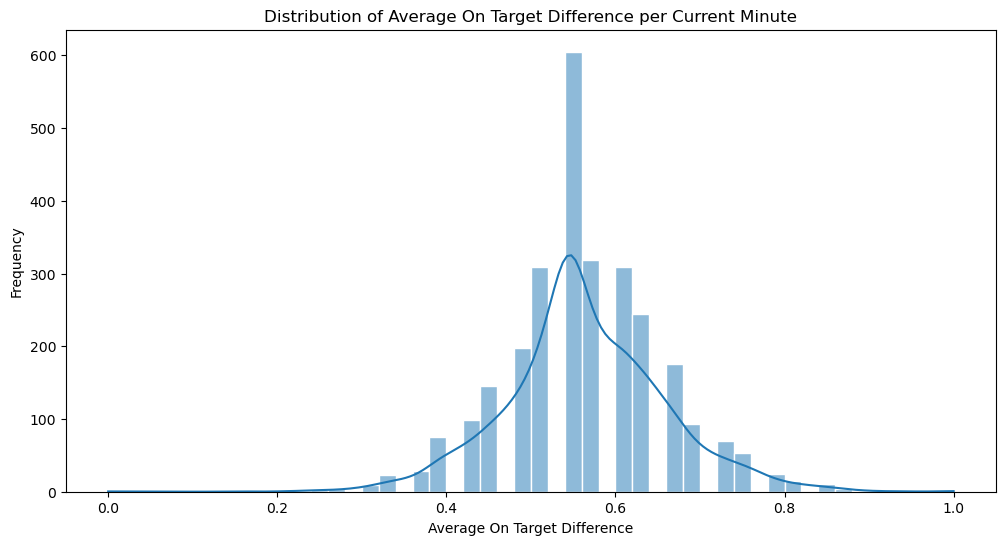

In [38]:
plt.figure(figsize=(12, 6))
sns.histplot(x='on_target_difference', data=df, bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average On Target Difference per Current Minute')
plt.xlabel('Average On Target Difference')
plt.ylabel('Frequency')
plt.show()

What are the quartiles, minimum, maximum values displayed, as well as the mean median mode and standard deviation based on the df['attacks_difference','attacks_dangerous_difference','on_target_difference']?

In [43]:
summary_stats = df[['attacks_difference', 'attacks_dangerous_difference', 'on_target_difference']].describe()

print("Summary Statistics:")
summary_stats

Summary Statistics:


,attacks_difference,attacks_dangerous_difference,on_target_difference
count,2824.000000,2824.000000,2824.000000
mean,0.498267,0.469763,0.563986
std,0.095329,0.120335,0.095770
min,0.000000,0.000000,0.000000
25%,0.456067,0.414201,0.515152
50%,0.510460,0.455621,0.545455
75%,0.543933,0.532544,0.606061
max,1.000000,1.000000,1.000000


What is the distribution of the average attacks_difference per current minute when home is winning?

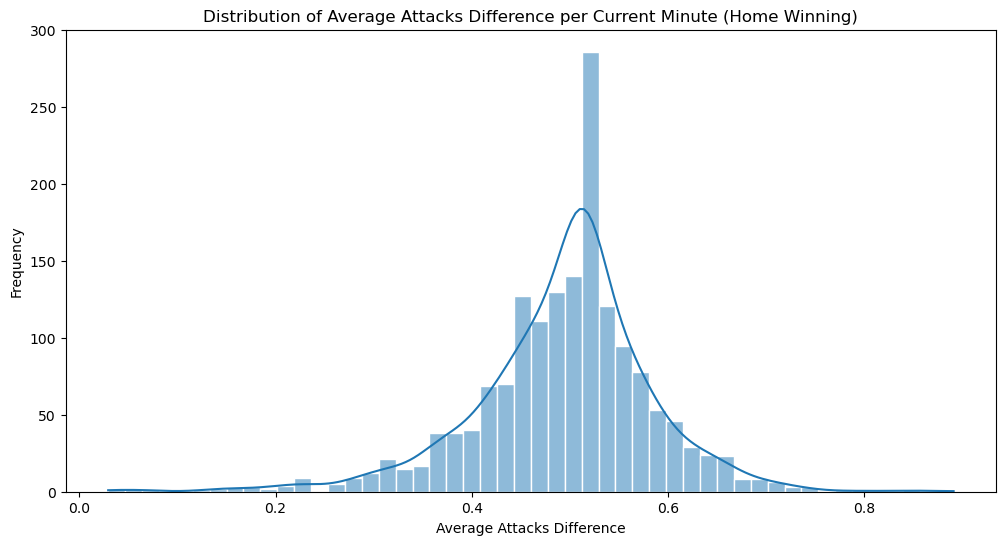

In [44]:
plt.figure(figsize=(12, 6))
sns.histplot(x='attacks_difference', data=df[df['home_is_winning']], bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average Attacks Difference per Current Minute (Home Winning)')
plt.xlabel('Average Attacks Difference')
plt.ylabel('Frequency')
plt.show()

What is the distribution of the average attacks_dangerous_difference per current minute  when home is winning?

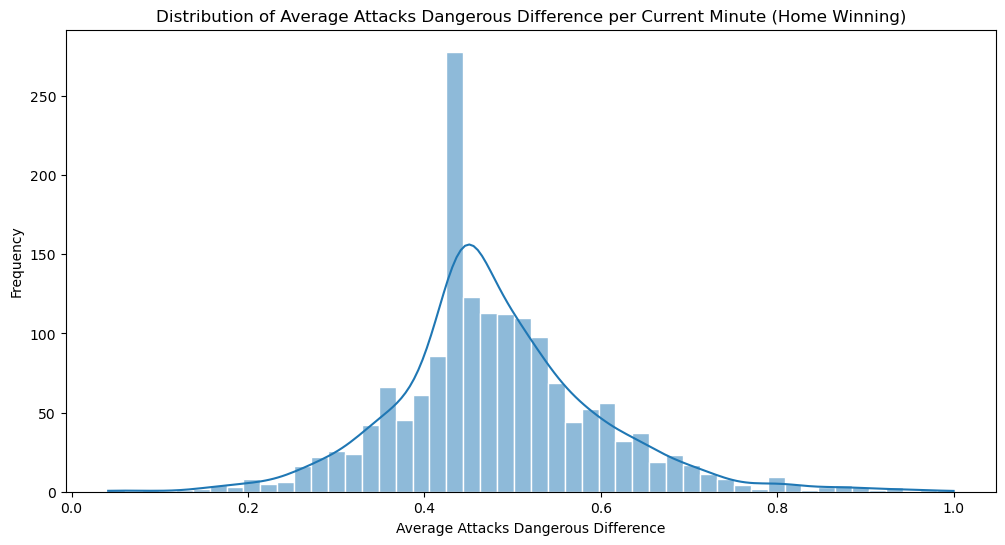

In [45]:
plt.figure(figsize=(12, 6))
sns.histplot(x='attacks_dangerous_difference', data=df[df['home_is_winning']], bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average Attacks Dangerous Difference per Current Minute (Home Winning)')
plt.xlabel('Average Attacks Dangerous Difference')
plt.ylabel('Frequency')
plt.show()

What is the distribution of the average on_target_difference per current minute  when home is winning?

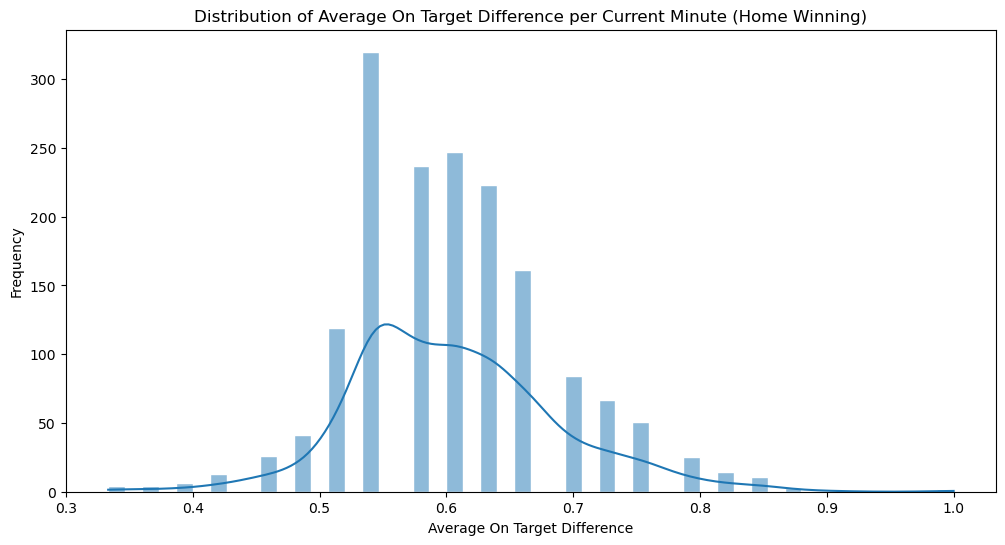

In [46]:
plt.figure(figsize=(12, 6))
sns.histplot(x='on_target_difference', data=df[df['home_is_winning']], bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average On Target Difference per Current Minute (Home Winning)')
plt.xlabel('Average On Target Difference')
plt.ylabel('Frequency')
plt.show()

What are the quartiles, minimum, maximum values displayed, as well as the mean, median, mode, and standard deviation based on `attacks_difference`, `attacks_dangerous_difference`, and `on_target_difference` when home is winning?

In [48]:
summary_stats_home_winning = df[df['home_is_winning']][['attacks_difference', 'attacks_dangerous_difference', 'on_target_difference']].describe()

print("Summary Statistics (Home Winning):")
summary_stats_home_winning

Summary Statistics (Home Winning):


,attacks_difference,attacks_dangerous_difference,on_target_difference
count,1659.000000,1659.000000,1659.000000
mean,0.493565,0.480831,0.606115
std,0.091403,0.115821,0.082123
min,0.029289,0.041420,0.333333
25%,0.451883,0.420118,0.545455
50%,0.506276,0.467456,0.606061
75%,0.539749,0.538462,0.666667
max,0.891213,1.000000,1.000000


What is the distribution of the average attacks_difference per current minute when home is not winning?

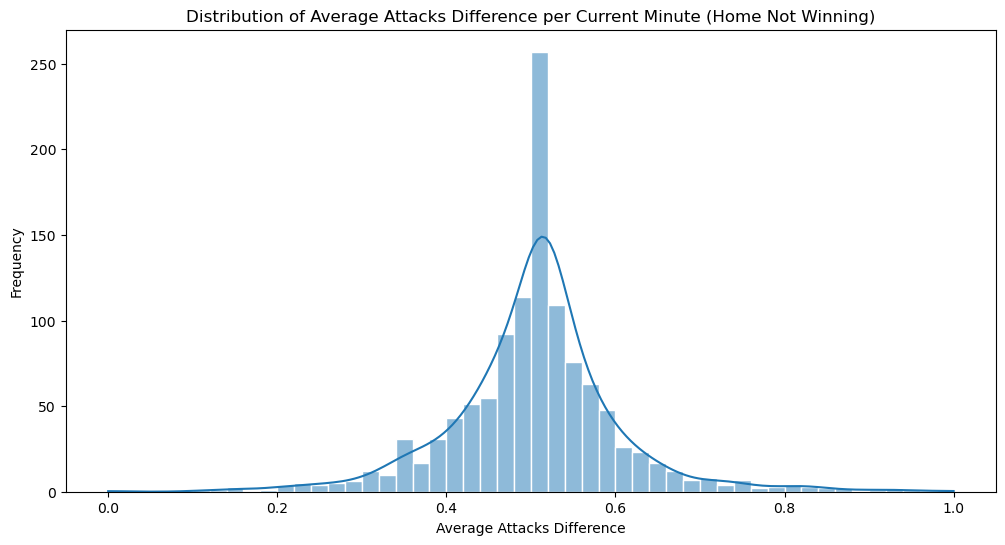

In [49]:
plt.figure(figsize=(12, 6))
sns.histplot(x='attacks_difference', data=df[~df['home_is_winning']], bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average Attacks Difference per Current Minute (Home Not Winning)')
plt.xlabel('Average Attacks Difference')
plt.ylabel('Frequency')
plt.show()

What is the distribution of the average attacks_dangerous_difference per current minute  when home is not winning?

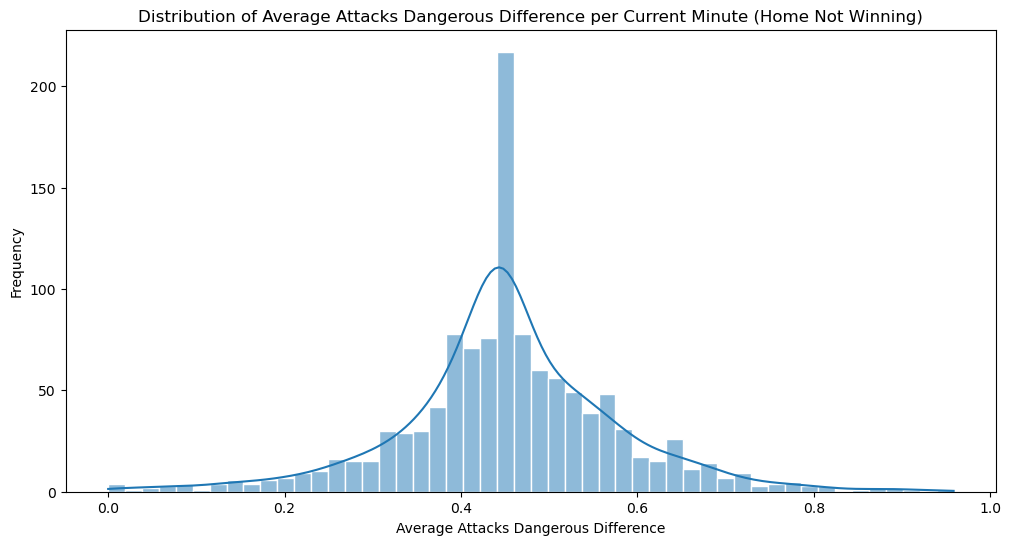

In [50]:
plt.figure(figsize=(12, 6))
sns.histplot(x='attacks_dangerous_difference', data=df[~df['home_is_winning']], bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average Attacks Dangerous Difference per Current Minute (Home Not Winning)')
plt.xlabel('Average Attacks Dangerous Difference')
plt.ylabel('Frequency')
plt.show()

What is the distribution of the average on_target_difference per current minute  when home is not winning?

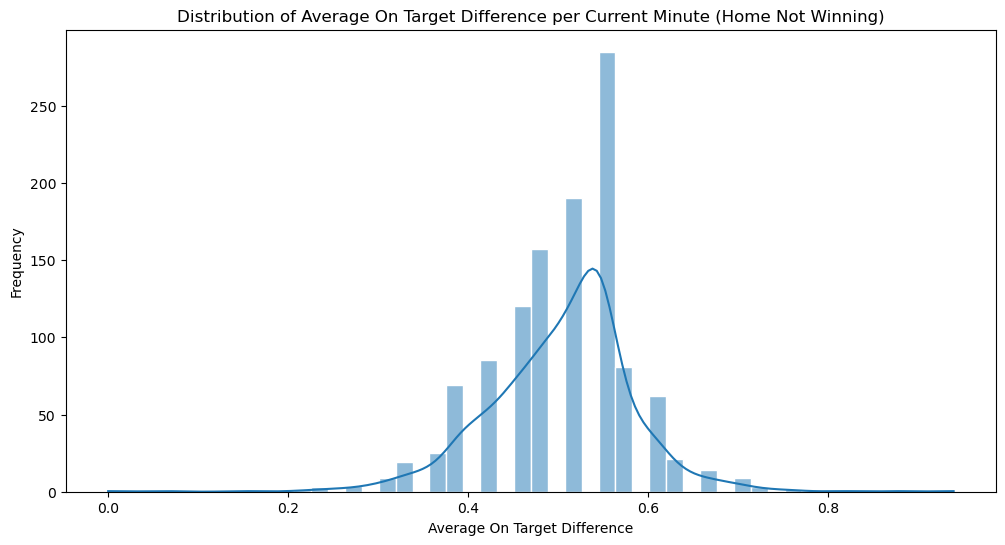

In [51]:
plt.figure(figsize=(12, 6))
sns.histplot(x='on_target_difference', data=df[~df['home_is_winning']], bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average On Target Difference per Current Minute (Home Not Winning)')
plt.xlabel('Average On Target Difference')
plt.ylabel('Frequency')
plt.show()

What are the quartiles, minimum, maximum values displayed, as well as the mean median mode and standard deviation based on the `attacks_difference`, `attacks_dangerous_difference`, and `on_target_difference` when home is not winning?

In [55]:
summary_stats_not_home_winning = df[~df['home_is_winning']][['attacks_difference', 'attacks_dangerous_difference', 'on_target_difference']].describe()

print("Summary Statistics (Home Not Winning):")
summary_stats_not_home_winning

Summary Statistics (Home Not Winning):


,attacks_difference,attacks_dangerous_difference,on_target_difference
count,1165.000000,1165.000000,1165.000000
mean,0.504962,0.454001,0.503993
std,0.100316,0.124853,0.080660
min,0.000000,0.000000,0.000000
25%,0.460251,0.396450,0.454545
50%,0.514644,0.443787,0.515152
75%,0.548117,0.514793,0.545455
max,1.000000,0.958580,0.939394


# Model training

For this project, we will be exploring 3 types of machine learning models: k-nearest neighbor, binomial classification, and multinomial classification.

## K-nearest neighbor

## Binomial classification

## Multinomial classification

# Hyperparameter tuning

# Model selection

# Insights and conclusions

# Bibliography
